# Spectral graph embedding

In the following I want to take a short look into how to perform laplacian spectral graph embedding. We will start with the mathematic basics on graphs. If you don't care about the math and just want to see the codeyou can jump right into the example. 

## Basics

We want to consider a directed graph $G = (V,E)$ with in total $|V|=N$ vertexes. Edges are defined by an adjacency matrix $A$, with the matrix values $a_{i,j}>0$. In the most simple case the adjacency matrix only contains ones and zeros but you can also weight connections by increasing the corresponding matrix values.

A usefull property for graphs is the degree matrix $D$ which contains information about the degree of each node. In our directed graph this corresponds to the incomming connections.
$$
D :=
\begin{cases}
    deg(v_{i}) & \text{if }  i=j\\ 
    0 & \text{else}
\end{cases}
$$

Whereby the $deg(v_i)$ is the number of times a edge terminates at vertex $v_i$. In our directed graph that is the number of incomming connections.

The Laplacian matrix is defined for directed graphs as


$$
L :=
\begin{cases}
    deg(v_{i}) & \text{if }  i=j\\ 
    -1 & \text{if } i \neq j \text{ and } v_i \text{ is adjacent to } v_j \\
    0 & \text{else}
\end{cases}
$$


In most cases one would use the symmetric normalized Laplacian matrix. It is normalized using the degree matrix.

$$
L_{\text{sym}} = D^{-1/2}LD^{-1/2} = I- D^{-1/2}AD^{-1/2}
$$


## Main objective

Given a directed graph we want to compute a low dimensions representation of this graph. Thus we want want to create a set of vectors $ X := \{ x_1,...x_N\} \in \!R^2$ such that the larger the values the values of the adjacency vectors the smaller the distance $||x_i-x_j||^2$ between the resulting vertcies. We consider the two dimensional case, but in theory the method should also work for a higher number of dimensions.

$$
\text{min}_{X \in \!R^2} \sum_{i,j}a_{i,j}||x_i-x_j||^2\\
=\text{min}_{X \in \!R^2} \text{ trace}(XLX^T)
$$

Trivially this is solved by $X=0$ but we are not searching for this sigularity, we avoid this by introducting further constrains to our problem. All solution vectors should be orthorgonal and the set should be normalized:
$$
XX^T = I \\
X\cdot\!1 = 0
$$

## Solution

We can solve the above defined problem by the graph visualization spectral algorithm.

- Compute Laplacian matrix $L$
- Compute lowest three eigenpairs $(e_1,\lambda_1),(e_2,\lambda_2) ,(e_3,\lambda_3)$ i.e. $Le_k=\lambda_ke_k$
- Construct the embedding $X$ using the eigenvectors $e_2,e_3$
    $$
    X=\begin{bmatrix}e_2^T \\ e_3^T\end{bmatrix}
    $$

I feel like deriving these formulas would be beyond the scope of this short blog entry. If you want to read up on the math I recommend this [book](http://www.cs.yale.edu/homes/spielman/PAPERS/SGTChapter.pdf) by Daniel Spielman. 

## Example

Next let us code up an example using the proposed algorithm.

In [10]:
# Normally you would create this adjacency matrix from your data
import numpy as np
A = np.zeros((14,14))
for i in range(13):
    A[i,i+1] = 1
    A[i+1,i] = 1
A[13,0] = 1
A[0,13] = 1
print(f"{A=}")

A=array([[0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [1., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 1., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 1., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 1.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0.]])


In [31]:
# Compute the degree
deg = np.sum(A, axis=1)
D = np.diag(deg)
print(f"{D=}")

D=array([[2., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 2., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 2., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 2., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 2., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 2., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 2., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 2., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 2., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 2., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 2., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 2., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 2., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 2.]])


In [56]:
# Compute Laplacian matrix
L = D-A
print(f"L=array({np.round(L,1)})")

L=array([[ 2. -1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0. -1.]
 [-1.  2. -1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0. -1.  2. -1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0. -1.  2. -1.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0. -1.  2. -1.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0. -1.  2. -1.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0. -1.  2. -1.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0. -1.  2. -1.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0. -1.  2. -1.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0. -1.  2. -1.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0. -1.  2. -1.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0. -1.  2. -1.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0. -1.  2. -1.]
 [-1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0. -1.  2.]])


In [52]:
# Compute eigenpairs
eigenvals, eigenvectors = np.linalg.eigh(L)

# sort by eigenvalues
i = eigenvals.argsort()[::-1]
eigenvals = eigenvals[i]
eigenvectors = eigenvectors[i]

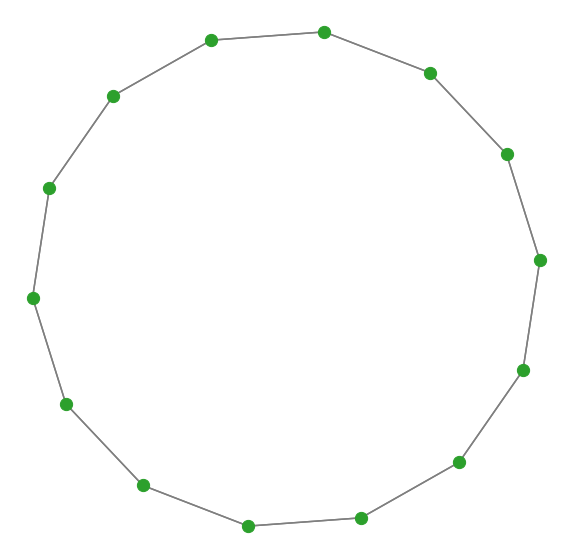

In [54]:
# Plotting
import matplotlib.pyplot as plt

def plot(x,y,A):
    # Remove axis and set figuresize
    plt.subplots(figsize=(10, 10))
    plt.axis('off')
    
    # Plot edges
    for i, b in enumerate(A):
        for j, a in enumerate(b):
            if a > 0:
                x_s = [x[i],x[j]]
                y_s = [y[i],y[j]]
                plt.plot(x_s,y_s,color="tab:gray")
                
    # Plot points
    plt.scatter(x,y,marker="o",s=150,zorder=10,color="tab:green")
                    
# Plot the coordinates for each point        
plot(eigenvectors[:,1],eigenvectors[:,2],A)